# Notebook to test some of the ARMA functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## 1. Finding $\theta$ parameter of MA(1) process

In [2]:
N = 1000
theta = 0.5
sigma = 1.0

In [3]:
np.random.seed(1)

In [4]:
X = np.zeros(N)
Z = np.random.normal(0, sigma, N)
X[0] = Z[0]
X[1:N] = Z[1:N] + theta * Z[0:(N - 1)] 

### 1.1. Grid search

In [5]:
from ARMA import MA1_grid_search

In [6]:
thetas = np.linspace(0.4, 0.6, 201)
(theta_hat, errors) = MA1_grid_search(X, thetas)

Text(0.5, 1.0, 'theta = 0.463')

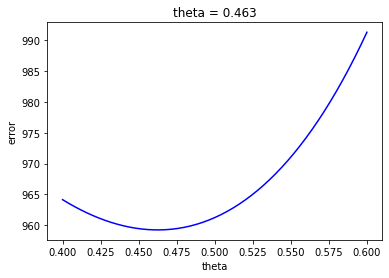

In [7]:
plt.plot(thetas, errors, 'b-')
plt.xlabel('theta')
plt.ylabel('error')
plt.title('theta = {:.3f}'.format(theta_hat))

### 1.2. Gradient descent

In [8]:
from ARMA import MA1_gradient

In [9]:
torch.manual_seed(1)

In [10]:
(thetas, loss) = MA1_gradient(X, 20, 0.0001)

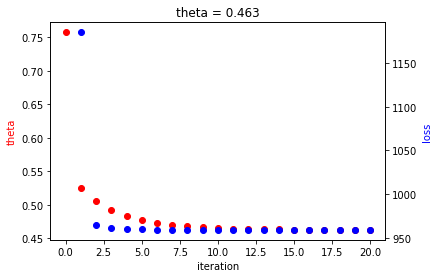

In [11]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('iteration') 
ax1.set_ylabel('theta', color = 'red') 
ax1.plot(np.arange(0, 21), thetas, 'ro') 
  
ax2 = ax1.twinx() 
ax2.set_ylabel('loss', color = 'blue') 
ax2.plot(np.arange(1, 21), loss, 'bo') 

plt.title('theta = {:.3f}'.format(thetas[-1]))
plt.show()